<a id="item42"></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
num_classes = 2

image_resize = 224

batch_size_training = 80
batch_size_validation = 80

In [3]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [4]:
train_generator = data_generator.flow_from_directory(
    'data - Copy/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 197 images belonging to 2 classes.


In [5]:
validation_generator=data_generator.flow_from_directory(
    'data - Copy/test',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 39 images belonging to 2 classes.


In [6]:
model = Sequential()

In [7]:
model.add(VGG16(
    include_top=False,
    pooling='max',
    weights='imagenet',
    ))

In [8]:
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.layers

In [10]:
model.layers[0].layers

In [11]:
model.layers[0].trainable = False

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs =22

In [27]:
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/22
3/3 [==============================] - 26s 9s/step - loss: 0.8110 - accuracy: 0.8883 - val_loss: 2.0790 - val_accuracy: 0.8205
Epoch 2/22
3/3 [==============================] - 19s 6s/step - loss: 0.7299 - accuracy: 0.8782 - val_loss: 2.0340 - val_accuracy: 0.8205
Epoch 3/22
3/3 [==============================] - 20s 7s/step - loss: 0.6259 - accuracy: 0.8985 - val_loss: 2.0142 - val_accuracy: 0.8205
Epoch 4/22
3/3 [==============================] - 121s 40s/step - loss: 0.5572 - accuracy: 0.9086 - val_loss: 1.9494 - val_accuracy: 0.8205
Epoch 5/22
3/3 [==============================] - 40s 13s/step - loss: 0.4861 - accuracy: 0.9188 - val_loss: 1.8807 - val_accuracy: 0.8205
Epoch 6/22
3/3 [==============================] - 21s 7s/step - loss: 0.4183 - accuracy: 0.9239 - val_loss: 1.8541 - val_accuracy: 0.8205
Epoch 7/22
3/3 [==============================] - 20s 7s/step - loss: 0.3488 - accuracy: 0.9391 - val_loss: 1.8453 - val_accuracy: 0.8205
Epoch 8/22
3/3 [===============

In [28]:
model.save('vgg max pooling.h5')

<a id="item43"></a>

## comparision of two models

Use the following cells to evaluate your models.

In [29]:
from keras.models import load_model
modelres = load_model('cocoon resnet.h5')

In [30]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

validation_generator = data_generator.flow_from_directory(
    'data - Copy/test',
    target_size=(image_resize, image_resize),
    shuffle=False)

Found 39 images belonging to 2 classes.


In [31]:
modelres.evaluate_generator(validation_generator)

[0.6216245889663696, 0.8461538553237915]

In [32]:
model.evaluate_generator(validation_generator)

[1.759840726852417, 0.7948718070983887]

<a id="item44"></a>

In [33]:
predict_modelresnet = modelres.predict_generator(validation_generator)

In [34]:
predict_modelvgg = model.predict_generator(validation_generator)

In [35]:
predict_modelvgg[:5]
y_classes1 = predict_modelvgg.argmax(axis=-1)
y_classes1[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [36]:
predict_modelresnet[:5]
y_classes2 = predict_modelresnet.argmax(axis=-1)
y_classes2[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [37]:
import cv2

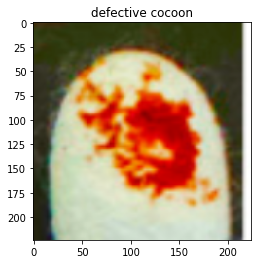

the input imsage is :defective cocoon


In [43]:
from keras.models import load_model
import cv2
from matplotlib import pyplot as plt

import numpy as np

model = load_model('cocoon resnet.h5')

model.compile(loss='binary_crossentropy',

              optimizer='rmsprop',

              metrics=['accuracy'])

img = cv2.imread('test_b1.jpg')
dis= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.resize(img,(224,224))
dis= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = np.reshape(img,[1,224,224,3])

classes = model.predict_classes(img)
plt.imshow(dis)
plt.title('defective cocoon')
plt.show()
if(classes==0):
    print("the input imsage is :defective cocoon")
else:
    print("the input image is :good cocooon")

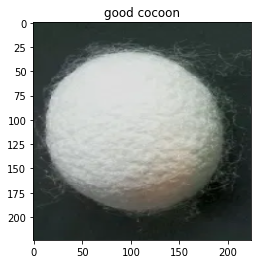

the input image is :good cocooon


In [44]:
from keras.models import load_model
import cv2
from matplotlib import pyplot as plt

import numpy as np

model = load_model('cocoon resnet.h5')

model.compile(loss='binary_crossentropy',

              optimizer='rmsprop',

              metrics=['accuracy'])

img = cv2.imread('test_g1.jpg')
dis= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.resize(img,(224,224))
dis= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = np.reshape(img,[1,224,224,3])


classes = model.predict_classes(img)
plt.imshow(dis)
plt.title('good cocoon')
plt.show()
if(classes==0):
    print("the input imsage is :defective cocoon")
else:
    print("the input image is :good cocooon")

#### 